<a href="https://colab.research.google.com/github/ankit-verma2000/LoanTap-Logistic-Regression/blob/main/Loantap_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Business Case: LoanTap Logistic Regression:

### Problem Statement:
LoanTap aims to optimize its loan distribution process to ensure funds are allocated to borrowers who are most likely to repay. The eligibility criteria for loan distribution plays a crucial role in achieving this objective.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Perform Exploratory Data Analysis

In [ ]:
df = pd.read_csv('Downloads/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 396030
Number of columns: 27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.describe(include= 'all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
(df['loan_status'].value_counts(normalize = True) * 100).round(2).to_frame()

,proportion
loan_status,
Fully Paid,80.39
Charged Off,19.61


In [ ]:
a = (df.isna().sum() / len(df) * 100 ).round(2).to_frame().reset_index()
a.rename(columns = {'index': 'Features', 0:'% of null values'})

,Features,% of null values
0,loan_amnt,0.00
1,term,0.00
2,int_rate,0.00
3,installment,0.00
4,grade,0.00
5,sub_grade,0.00
6,emp_title,5.79
7,emp_length,4.62
8,home_ownership,0.00
9,annual_inc,0.00


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
# convert string to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

## Univariate Analysis

In [ ]:
flt_list = df.select_dtypes('float64').columns.to_list()

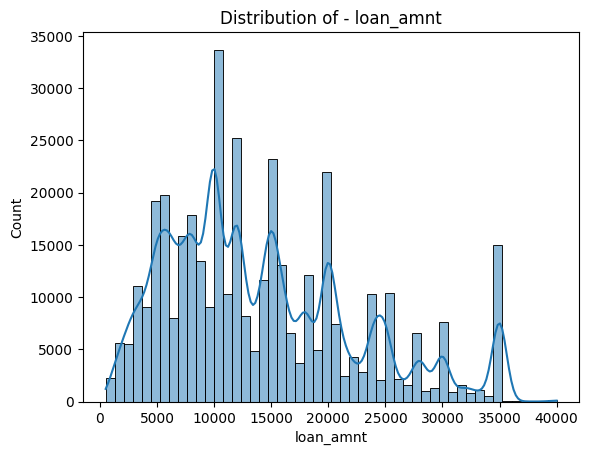

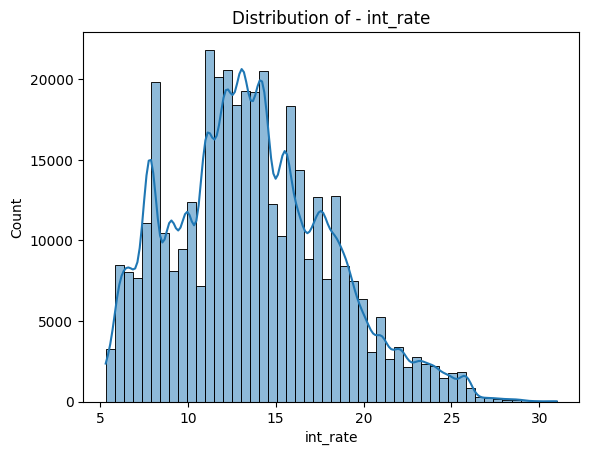

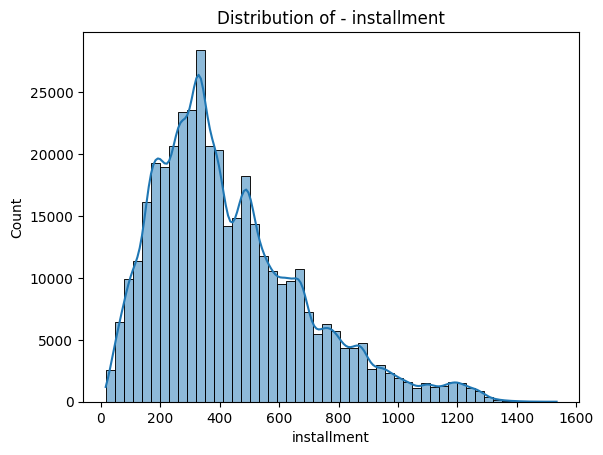

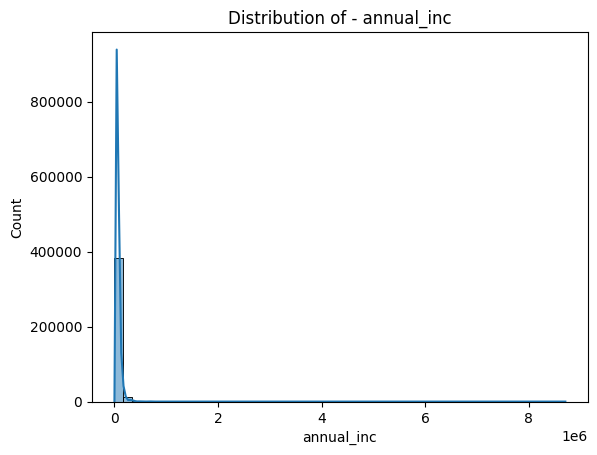

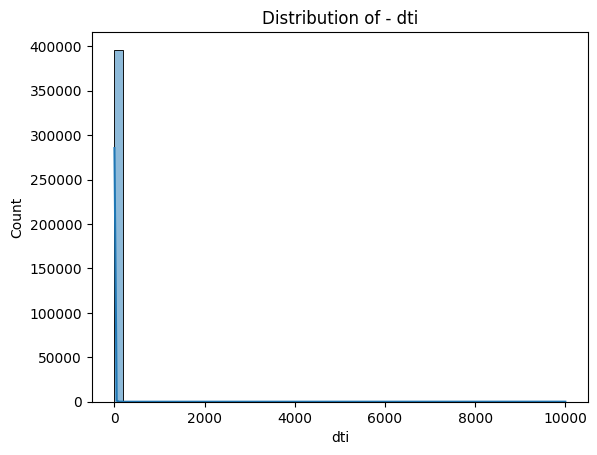

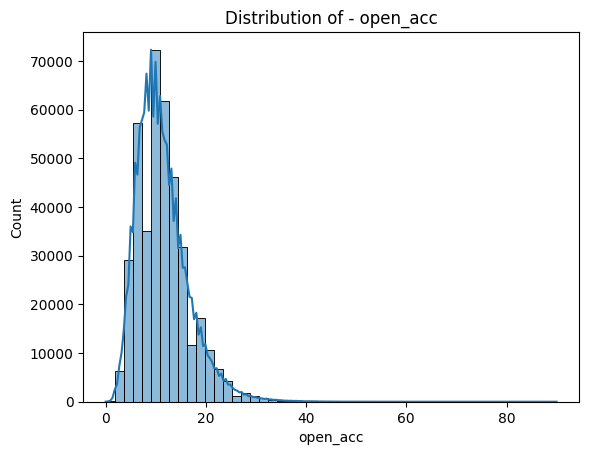

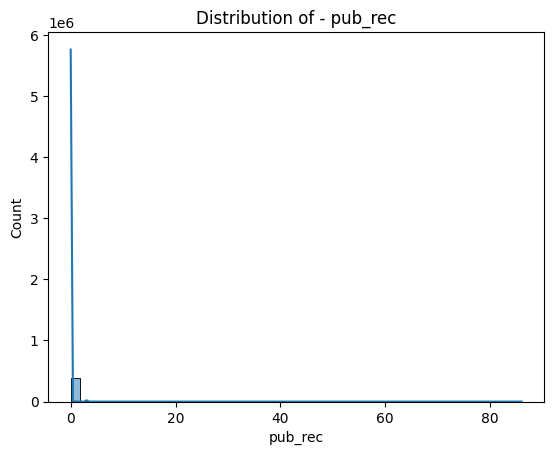

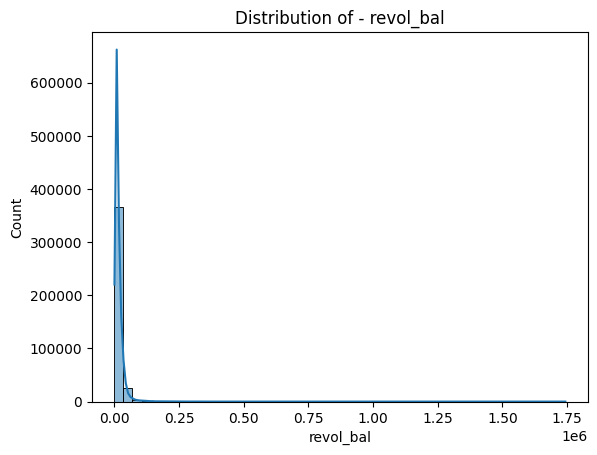

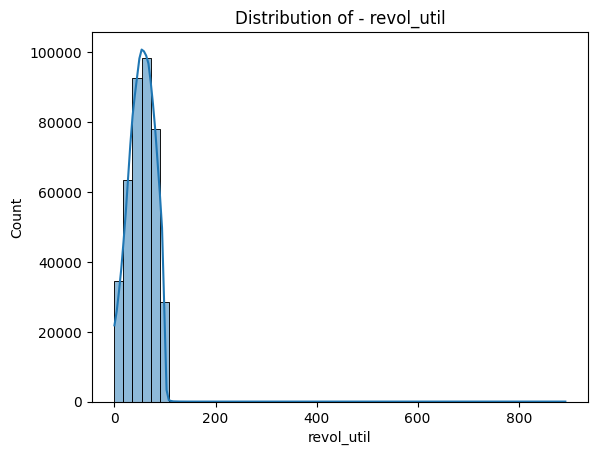

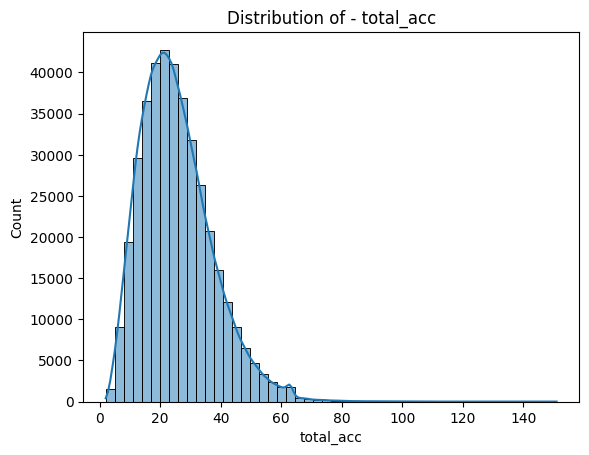

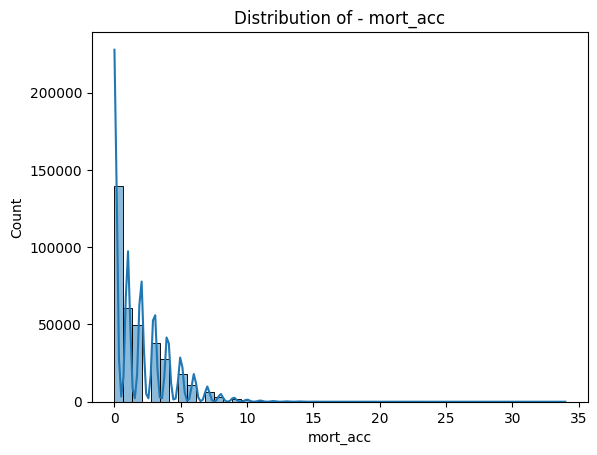

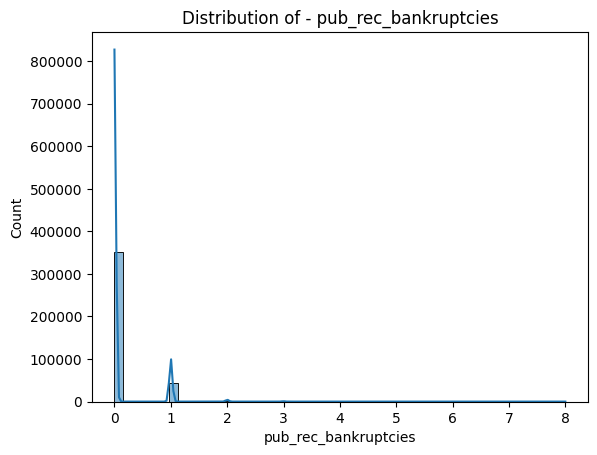

In [ ]:
for i in flt_list:
    plt.title('Distribution of - {}'.format(i) )
    sns.histplot(data = df, x = i, kde = True, bins = 50)
    plt.show()

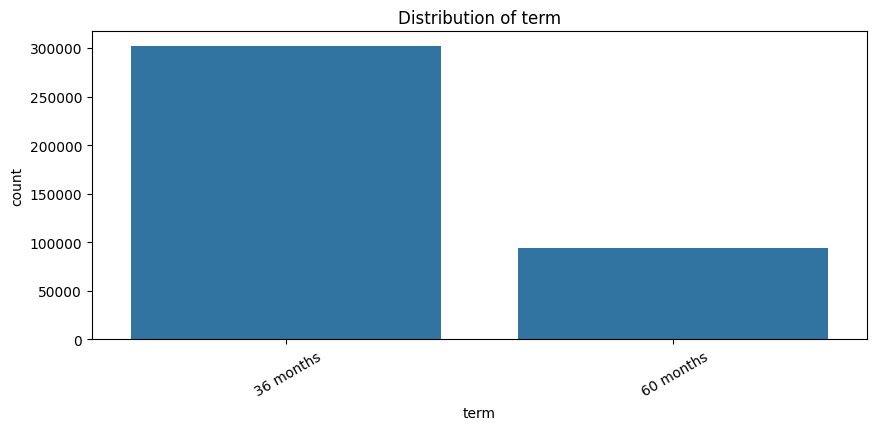

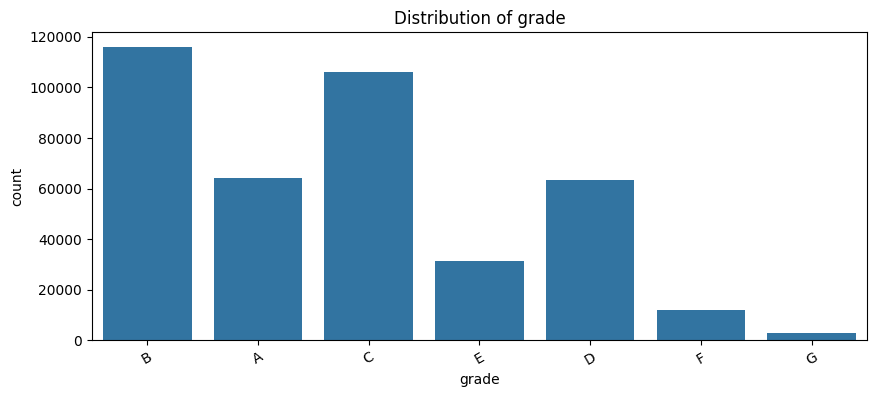

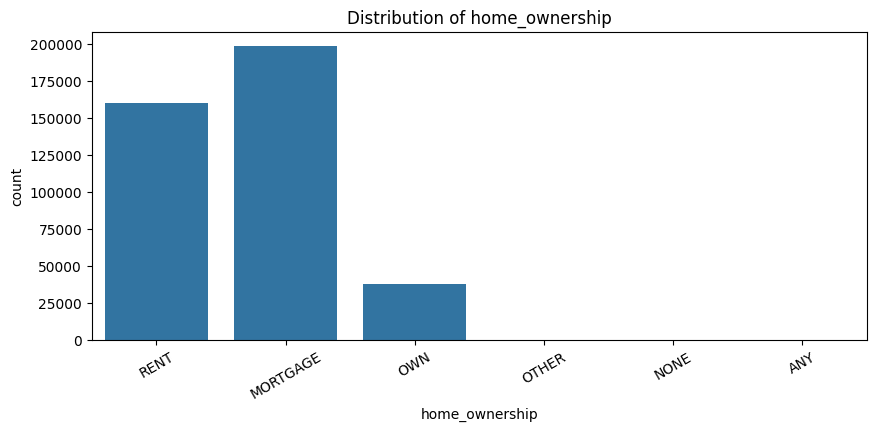

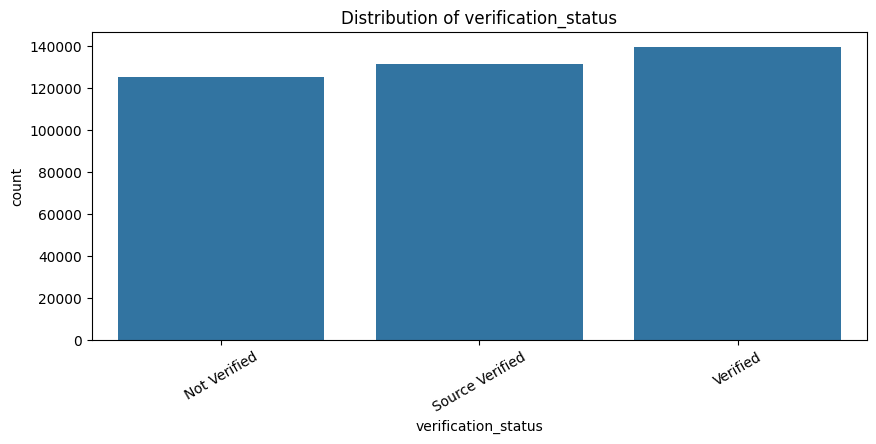

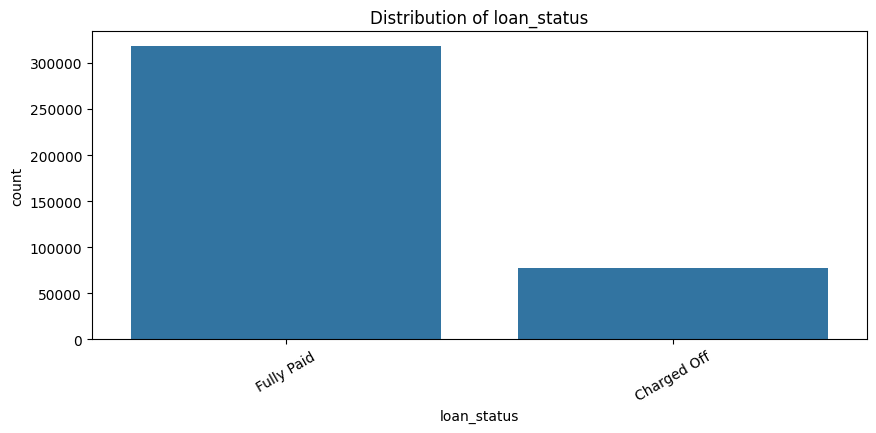

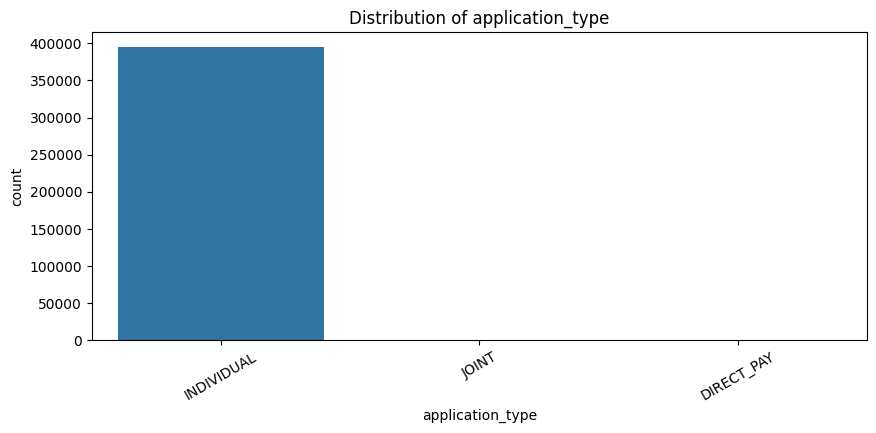

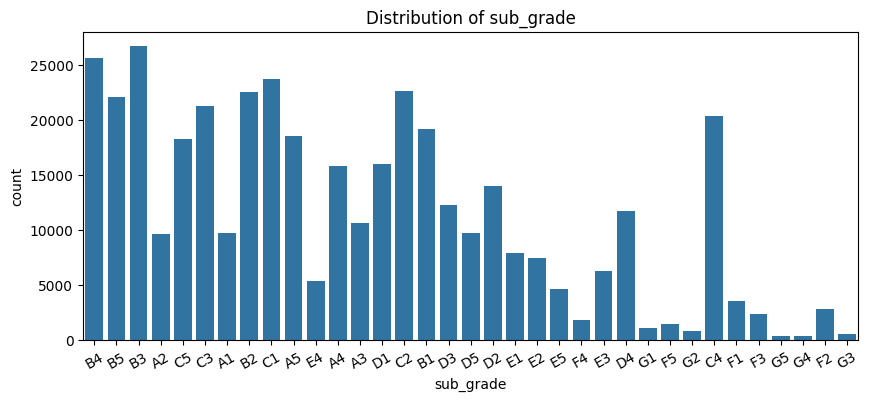

In [ ]:
cat_vars = ['term', 'grade','home_ownership', 'verification_status', 'loan_status', 'application_type', 'sub_grade', ]
for i in cat_vars:
    plt.figure(figsize=(10, 4))
    plt.title('Distribution of {}'.format(i))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 30)
    plt.show()

## Bivariate analysis:

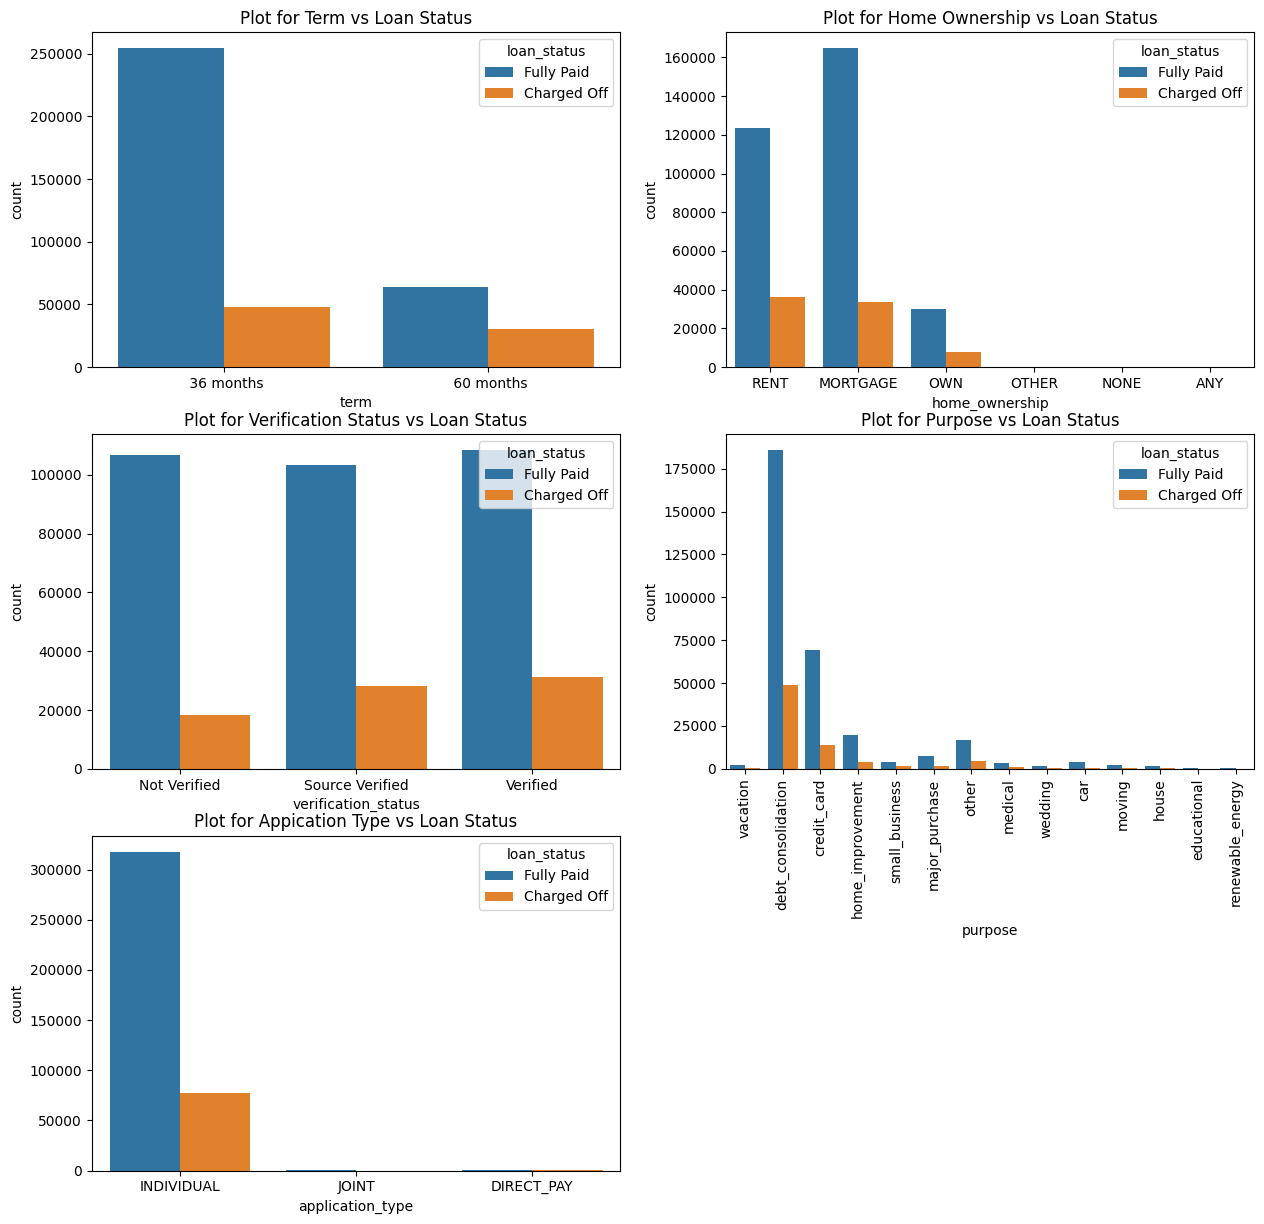

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(data=df, x='term',hue='loan_status')
plt.title('Plot for Term vs Loan Status')

plt.subplot(4,2,2)
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.title('Plot for Home Ownership vs Loan Status')

plt.subplot(4,2,3)
sns.countplot(data=df, x='verification_status',hue='loan_status')
plt.title('Plot for Verification Status vs Loan Status')

plt.subplot(4,2,4)
sns.countplot(data=df,x ='purpose',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Plot for Purpose vs Loan Status')

plt.subplot(4,2,5)
sns.countplot(data = df, x = 'application_type', hue = 'loan_status')
plt.title('Plot for Appication Type vs Loan Status')

plt.show()

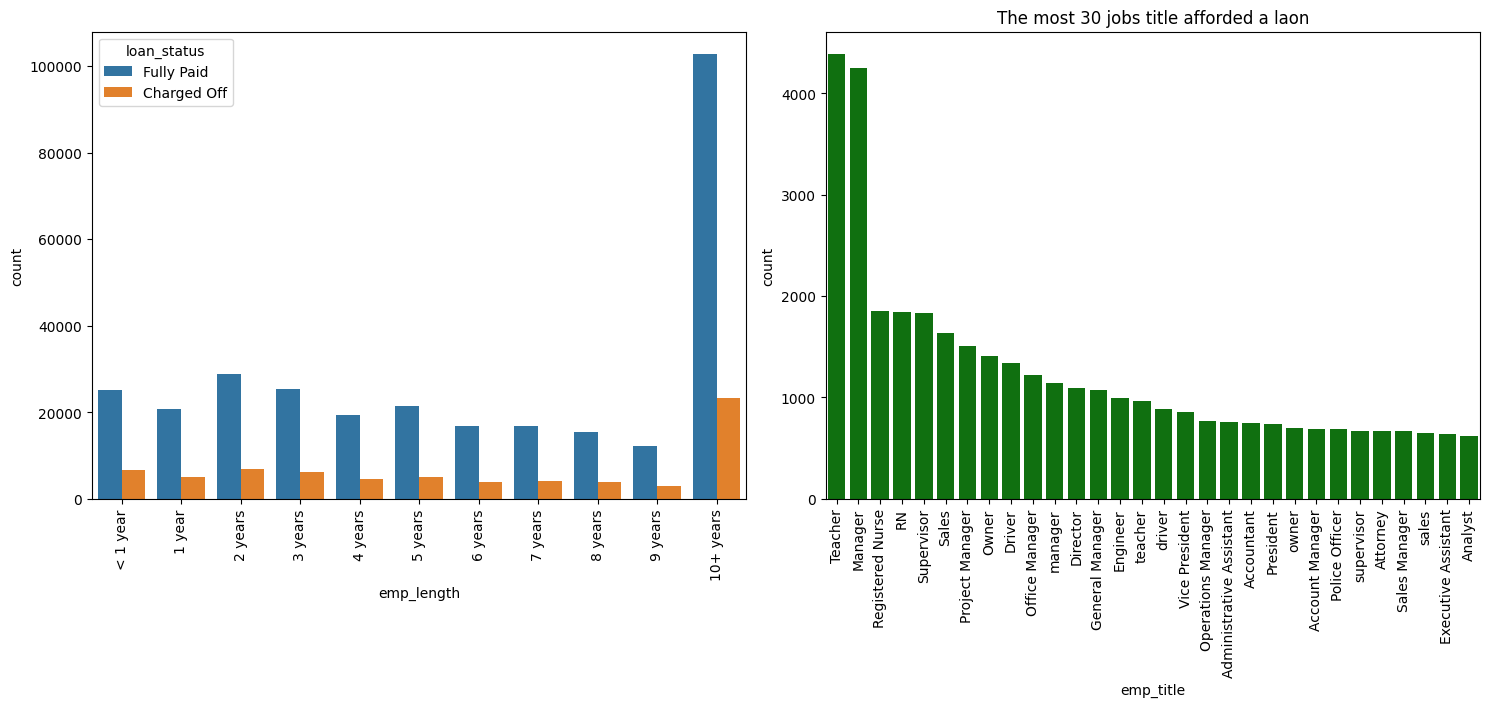

In [ ]:
# Top 30 job title of individual who took loan

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(data = df, x = 'emp_length',hue='loan_status', order=order)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.barplot(x = df['emp_title'].value_counts()[:30].index,y = df['emp_title'].value_counts()[:30],color='green')
#plt.barh(loantap.emp_title.value_counts()[:30].index,loantap.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.xticks(rotation =90)
plt.tight_layout()

plt.show()

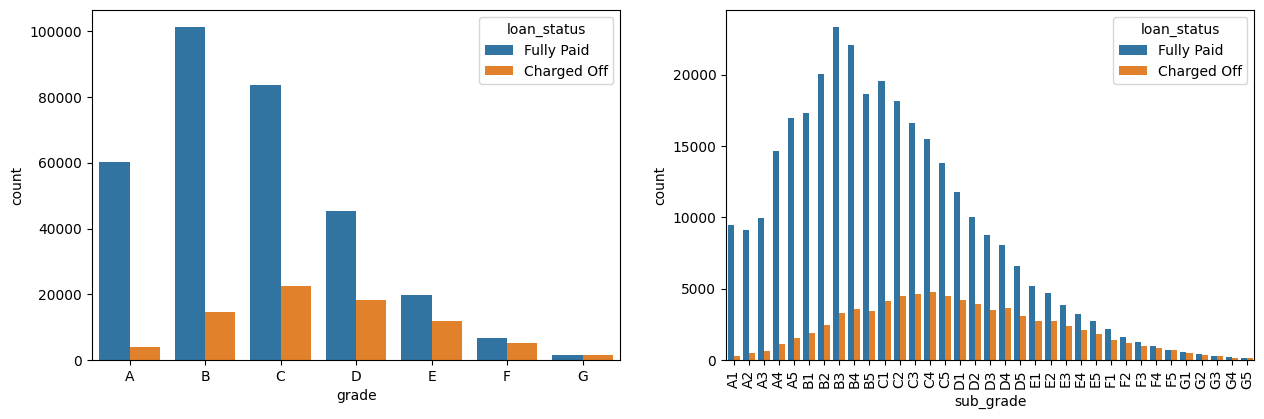

In [ ]:
# Risk Rating for people who tooked loan:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot( data = df ,x ='grade', hue ='loan_status', order = sorted(df['grade'].unique().tolist()))

plt.subplot(2, 2, 2)
sns.countplot(data = df, x = 'sub_grade', hue = 'loan_status', order = sorted(df['sub_grade'].unique().tolist()))
plt.xticks(rotation=90)

plt.show()

### Correlation Analysis

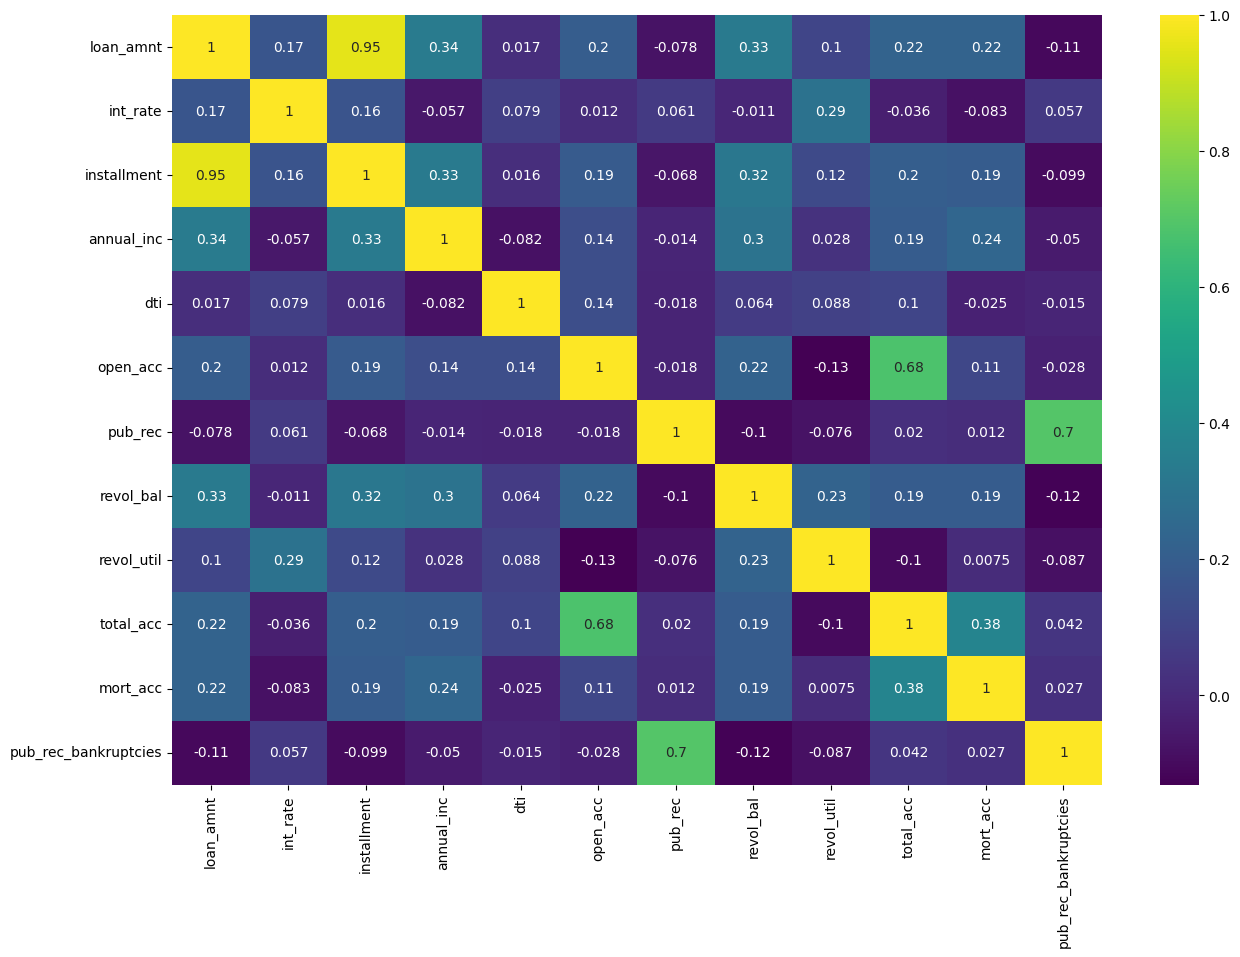

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap= 'viridis')
plt.show()

## Feature Engineering:

In [ ]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >1.1:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >1.1:
        return 1
    else:
        return number

In [ ]:
df['pub_rec']=df['pub_rec'].apply(pub_rec)
df['mort_acc']=df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(pub_rec)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

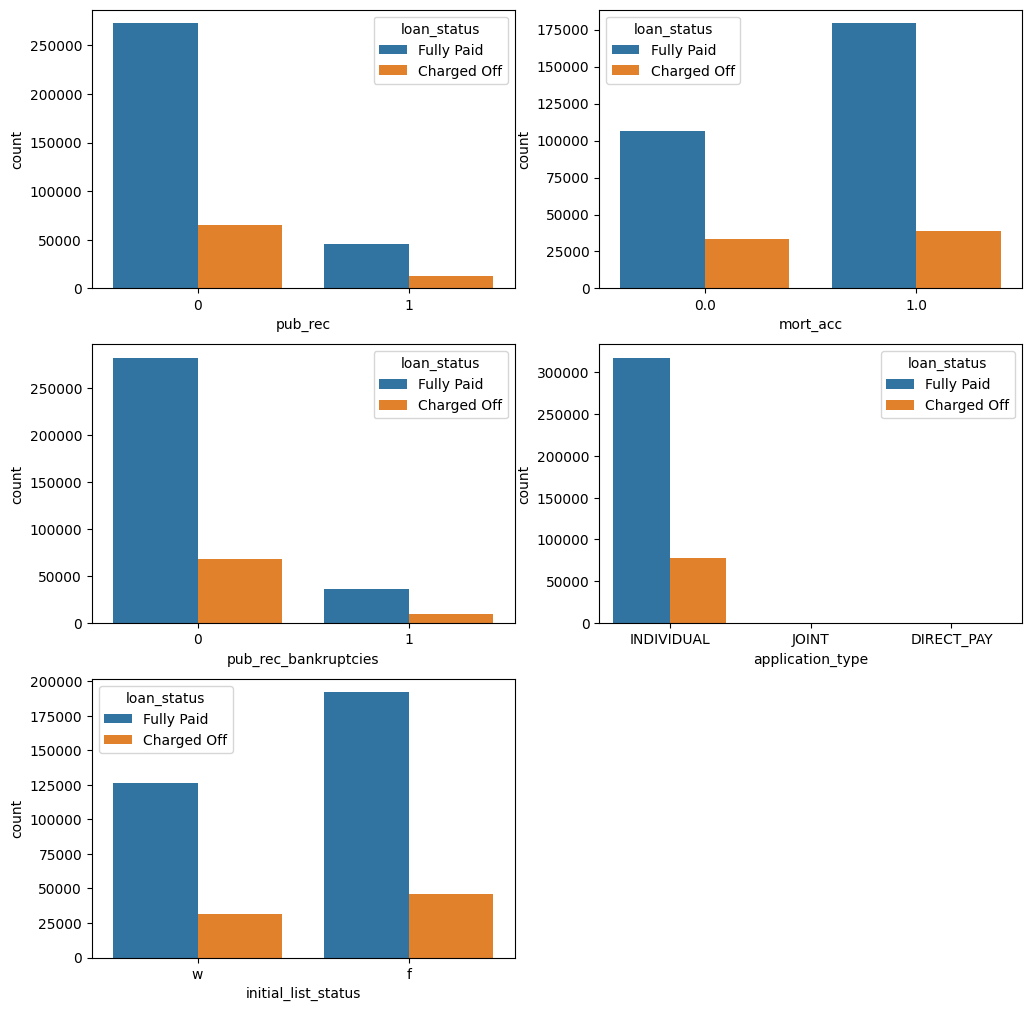

In [ ]:
plt.figure(figsize=(12,21))
plt.subplot(5,2,1)
sns.countplot(data = df, x = 'pub_rec', hue = 'loan_status')

plt.subplot(5,2,2)
sns.countplot(data = df,x = 'mort_acc', hue = 'loan_status')

plt.subplot(5,2,3)
sns.countplot(data = df,x = 'pub_rec_bankruptcies', hue = 'loan_status')

plt.subplot(5,2,4)
sns.countplot(data=df,x='application_type', hue = 'loan_status')

plt.subplot(5,2,5)
sns.countplot(data=df,x='initial_list_status', hue = 'loan_status')

# plt.subplot(5,2,1)
# sns.countplot(data['pub_rec'], hue = 'loan_status')

# plt.subplot(5,2,1)
# sns.countplot(data['pub_rec'], hue = 'loan_status')

plt.show()

## Duplicate Value

In [ ]:
df.duplicated().sum()

0

## Missing value and Missing value Treatment:

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [ ]:
(df.isna().sum()* 100/len(df)).round(2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.00
address                 0.00
dtype: float64

## Treatment of missing value:

In [ ]:
# Handling these features;
missing_data = df[['emp_title', 'emp_length','revol_util','mort_acc']]
missing_data.isna().sum()

emp_title     22927
emp_length    18301
revol_util      276
mort_acc      37795
dtype: int64

In [ ]:
title_mode = df['emp_title'].mode()[0]
df['emp_title'] = df['emp_title'].fillna(title_mode)

In [ ]:
len_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(len_mode)

In [ ]:
# handle missing value using sklearn
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
df['revol_util'] = si.fit_transform(df[['revol_util']])
df['mort_acc'] = si.fit_transform(df[['mort_acc']])

In [ ]:
pd.set_option('display.max_columns', None)
df.drop(columns = 'title', inplace= True)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Outlier Detection

In [ ]:
num_col = df.select_dtypes(include = 'number').columns
num_col

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

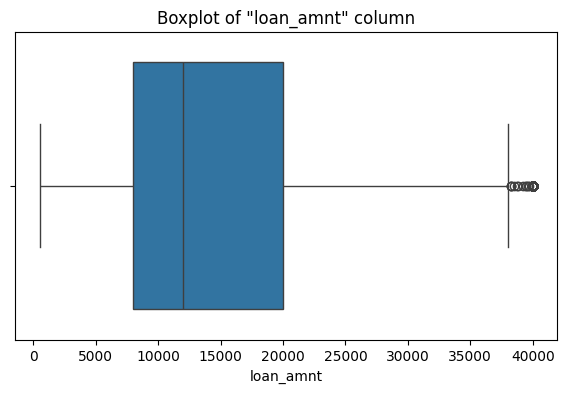

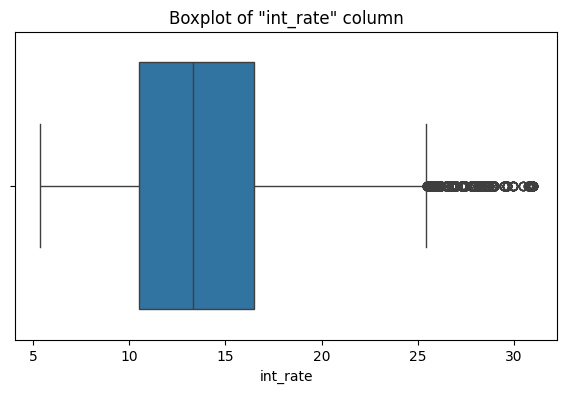

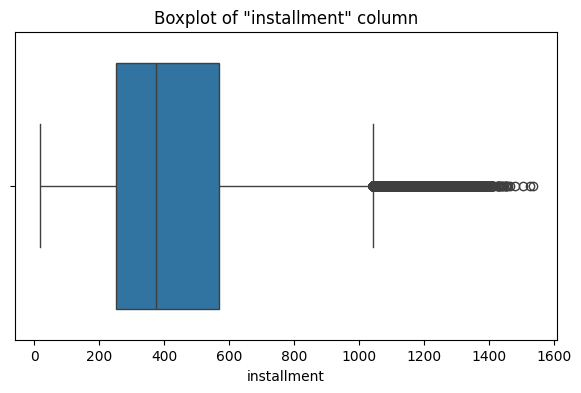

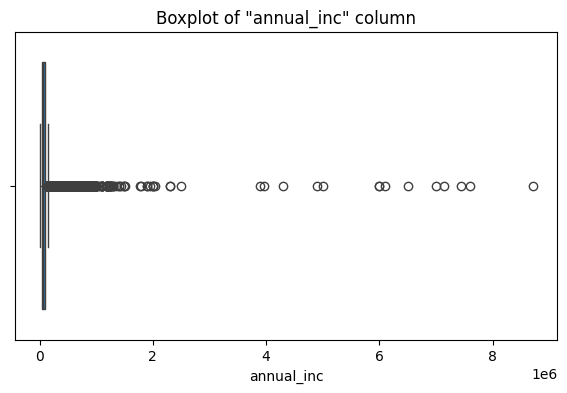

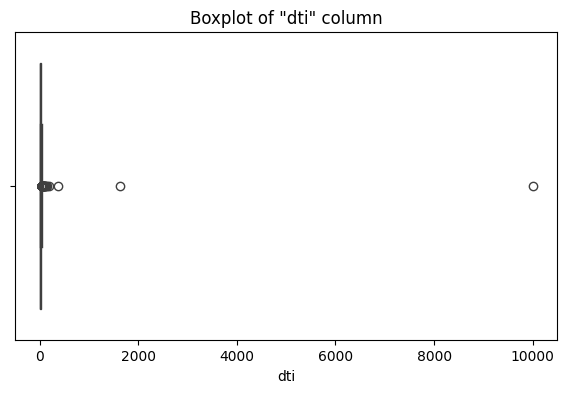

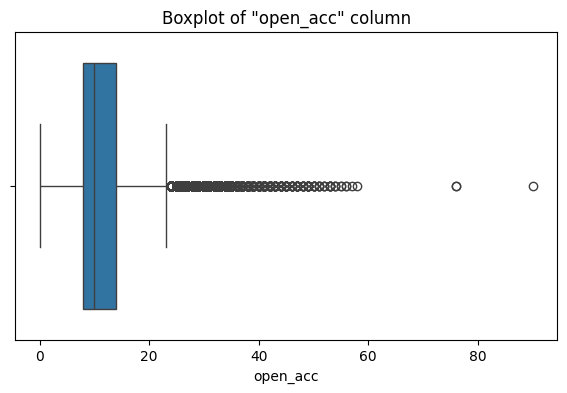

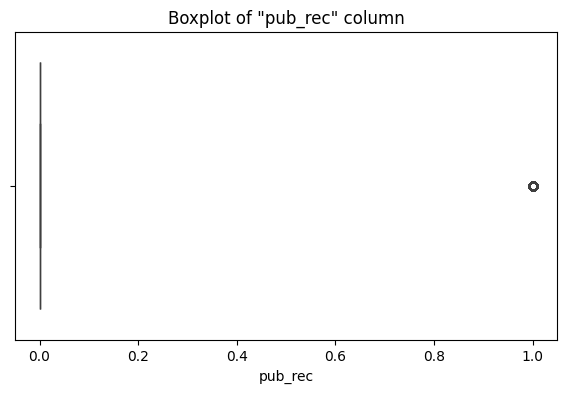

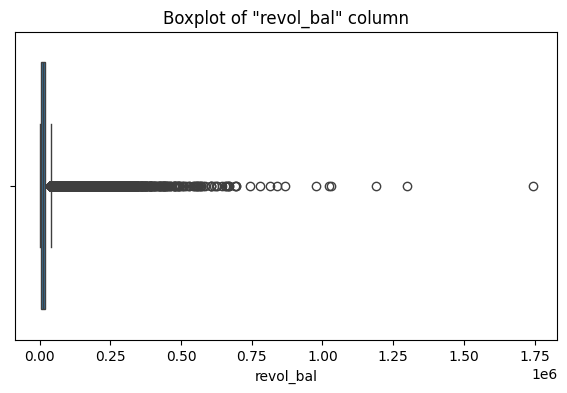

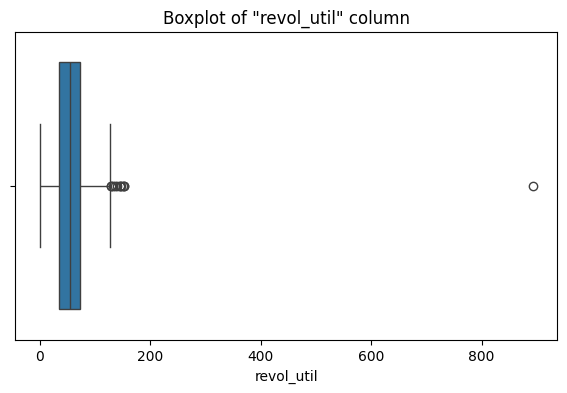

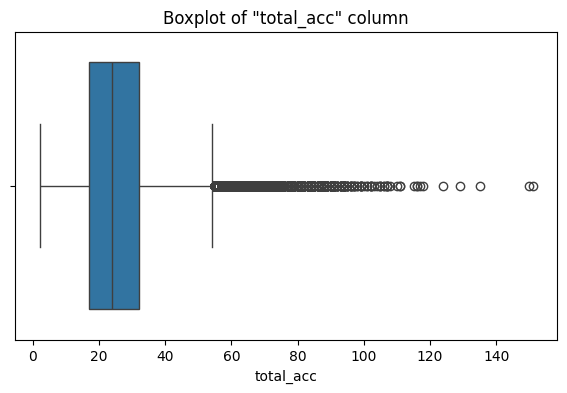

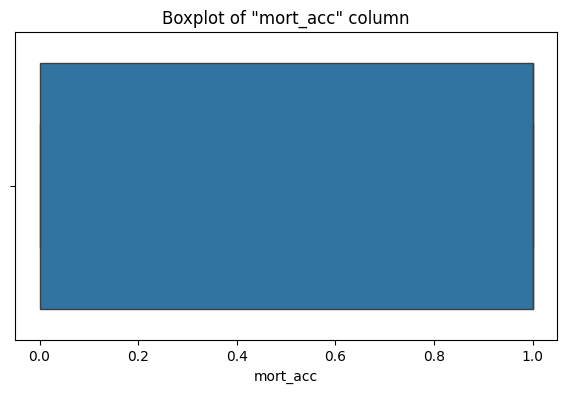

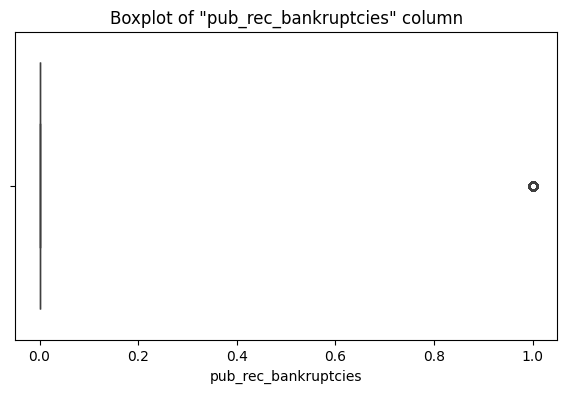

In [ ]:
def box_plot(col):
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of "{col}" column')
    plt.show()

for col in num_col:
    box_plot(col)

## Outlier treatment:

In [ ]:
new_df = df.copy()
new_df.shape

(396030, 26)

In [ ]:
out_lst = ['loan_amnt', 'int_rate', 'installment','annual_inc','dti','open_acc','pub_rec', 'revol_bal','revol_util','total_acc', 'mort_acc']
for col in out_lst:
  mean = new_df[col].mean()
  std = new_df[col].std()
  lower_limt, upper_limit = mean-3*std, mean+3*std
  new_df = new_df[ (new_df[col] > lower_limt) & (new_df[col] < upper_limit) ]
new_df.shape

(374562, 26)

In [ ]:
new_df.isna().sum().sum()

0

In [ ]:
new_df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [ ]:
lst_status_cnv = {'w':0, 'f':1}

In [ ]:
new_df['initial_list_status'] = new_df['initial_list_status'].map(lst_status_cnv)

In [ ]:
new_df['initial_list_status'].unique()

array([0, 1], dtype=int64)

In [ ]:
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# Extraction and Conversion of data from categorical columns:
new_df['emp_length'] = new_df['emp_length'].str.split(" ").str[-2]
new_df['updt_emp_length_yrs'] = new_df['emp_length'].replace('10+', '10')
new_df['updt_emp_length_yrs'] = pd.to_numeric(new_df['updt_emp_length_yrs'])
new_df = new_df.drop(columns= 'emp_length')

In [ ]:
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,updt_emp_length_yrs
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",6
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0,"679 Luna Roads\r\nGreggshire, VA 11650",9


## Feature engineering

In [ ]:
import re
new_df['ad_code'] = new_df['address'].apply(lambda x : (re.findall('[A-Z]{2} [0-9]{5}' ,str(x)))[0])
new_df['ad_diccode'] = new_df['ad_code'].apply(lambda x : (str(x)).split(' ')[0])
new_df['ad_dicpin'] = new_df['ad_code'].apply(lambda x : (str(x)).split(' ')[1])

In [ ]:
new_df = new_df.drop(columns = ['address','ad_code'])

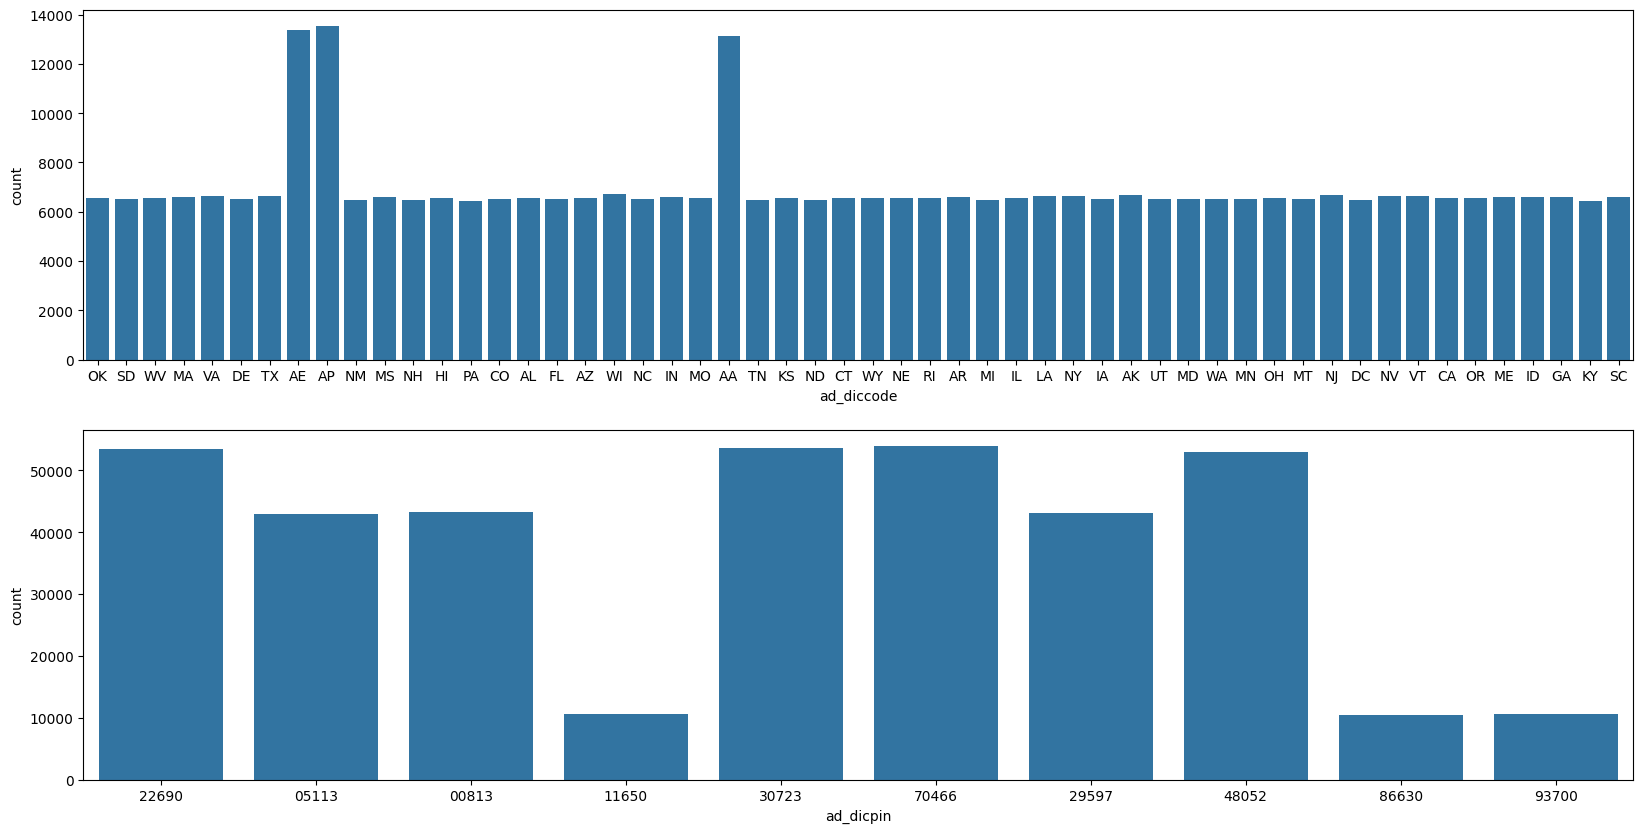

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.countplot(x= new_df['ad_diccode'])

plt.subplot(2,1,2)
sns.countplot(x= new_df['ad_dicpin']);

In [ ]:
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_diccode,ad_dicpin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0,10,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0,4,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0,1,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0,6,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0,9,VA,11650


In [ ]:
new_df['issue_month'] = new_df['issue_d'].apply(lambda x : str(x).split('-')[0])
new_df['issue_year'] = new_df['issue_d'].apply(lambda x : str(x).split('-')[1])

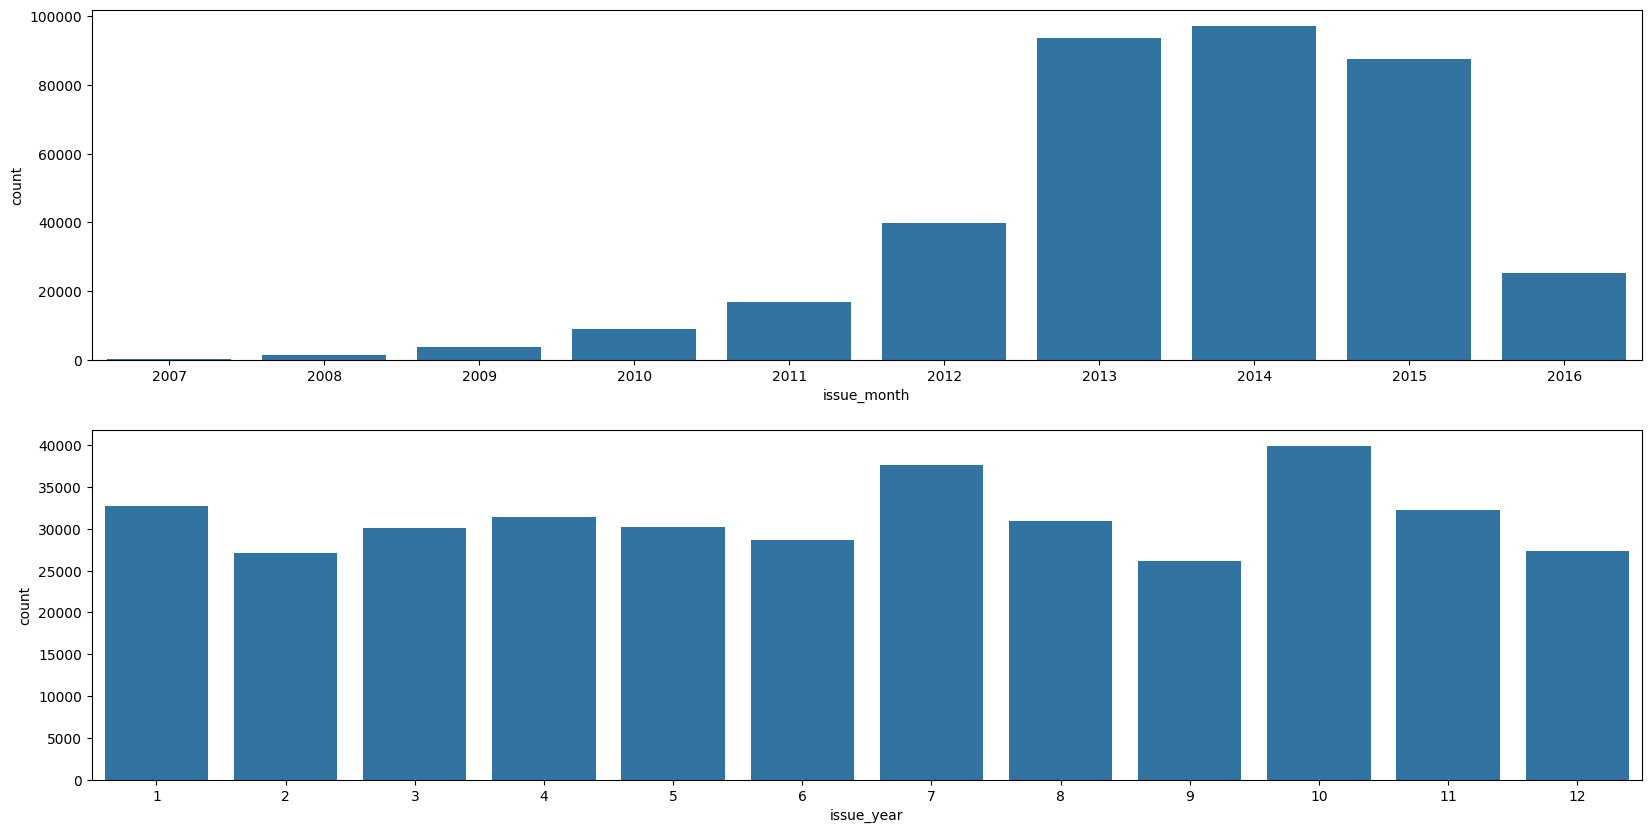

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.countplot(x= new_df['issue_month'])

plt.subplot(2,1,2)
sns.countplot(x= new_df['issue_year']);

In [ ]:
# we dont want this col anymore or it will get in milticoleanirity
new_df = new_df.drop(columns=['issue_d'], axis=1)

In [ ]:
new_df[['earliest_cr_line']].head()

,earliest_cr_line
0,1990-06-01
1,2004-07-01
2,2007-08-01
3,2006-09-01
4,1999-03-01


In [ ]:
new_df['earliest_cr_line_month'] = new_df['earliest_cr_line'].apply(lambda x : str(x).split('-')[1])
new_df['earliest_cr_line_year'] = new_df['earliest_cr_line'].apply(lambda x : str(x).split('-')[0])

In [ ]:
new_df = new_df.drop(columns=['earliest_cr_line'], axis=1)

In [ ]:
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0,10,OK,22690,2015,01,06,1990
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0,4,SD,05113,2015,01,07,2004
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0,1,WV,05113,2015,01,08,2007
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0,6,MA,00813,2014,11,09,2006
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0,9,VA,11650,2013,04,03,1999


In [ ]:
#new_df = new_df.drop(columns=['updt_emp_length_yrs'], axis=1)

## Encoding catagorical columns

In [ ]:
new_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values={' 36 months': 36, ' 60 months':60}
new_df['term'] = new_df['term'].map(term_values)

In [ ]:
#new_df['emp_length'][:5]

In [ ]:
# Encode the 'Categorical' variable using Label Encoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for i in ('grade', 'sub_grade','home_ownership', 'purpose','verification_status', 'initial_list_status', 'application_type'):

  # Fit and transform the categorical column
  new_df[i] = label_encoder.fit_transform(new_df[i])

In [ ]:
#Convert variables from 'Category' datatype to 'String' and 'Integer' datatype
for i in ('grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'):
  new_df[i] = new_df[i].astype(str)
new_df['issue_year'] = new_df['issue_year'].astype(int)
new_df['issue_month'] = new_df['issue_month'].astype(int)

In [ ]:
new_df.drop(columns = 'emp_title',inplace = True)

In [ ]:
new_df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,1,8,5,117000.0,0,Fully Paid,12,26.24,16.0,0,36369.0,41.8,25.0,0,1,0.0,0,10,OK,22690,2015,1,06,1990
1,8000.0,36,11.99,265.68,1,9,1,65000.0,0,Fully Paid,2,22.05,17.0,0,20131.0,53.3,27.0,1,1,1.0,0,4,SD,05113,2015,1,07,2004
2,15600.0,36,10.49,506.97,1,7,5,43057.0,1,Fully Paid,1,12.79,13.0,0,11987.0,92.2,26.0,1,1,0.0,0,1,WV,05113,2015,1,08,2007


### Preparing the target feature

In [ ]:
new_df['loan_status'] = label_encoder.fit_transform(new_df['loan_status'])

## Data preparation for modeling:

In [ ]:
# Separate features and target variable:

X = new_df.drop(columns= ['loan_status','ad_diccode'])
y = new_df['loan_status']

In [ ]:
print(X.shape)
print(y.shape)

(374562, 26)
(374562,)


In [ ]:
X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,1,8,5,117000.0,0,12,26.24,16.0,0,36369.0,41.8,25.0,0,1,0.0,0,10,22690,2015,1,06,1990
1,8000.0,36,11.99,265.68,1,9,1,65000.0,0,2,22.05,17.0,0,20131.0,53.3,27.0,1,1,1.0,0,4,05113,2015,1,07,2004
2,15600.0,36,10.49,506.97,1,7,5,43057.0,1,1,12.79,13.0,0,11987.0,92.2,26.0,1,1,0.0,0,1,05113,2015,1,08,2007
3,7200.0,36,6.49,220.65,0,1,5,54000.0,0,1,2.60,6.0,0,5472.0,21.5,13.0,1,1,0.0,0,6,00813,2014,11,09,2006
4,24375.0,60,17.27,609.33,2,14,1,55000.0,2,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,1.0,0,9,11650,2013,4,03,1999


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int32

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 43)

In [ ]:
X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,1,8,5,117000.0,0,12,26.24,16.0,0,36369.0,41.8,25.0,0,1,0.0,0,10,22690,2015,1,06,1990
1,8000.0,36,11.99,265.68,1,9,1,65000.0,0,2,22.05,17.0,0,20131.0,53.3,27.0,1,1,1.0,0,4,05113,2015,1,07,2004
2,15600.0,36,10.49,506.97,1,7,5,43057.0,1,1,12.79,13.0,0,11987.0,92.2,26.0,1,1,0.0,0,1,05113,2015,1,08,2007
3,7200.0,36,6.49,220.65,0,1,5,54000.0,0,1,2.60,6.0,0,5472.0,21.5,13.0,1,1,0.0,0,6,00813,2014,11,09,2006
4,24375.0,60,17.27,609.33,2,14,1,55000.0,2,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,1.0,0,9,11650,2013,4,03,1999


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(299649, 26)
(299649,)
(37456, 26)
(37456,)
(37457, 26)
(37457,)


In [ ]:
print(f'Traning Data:\n{y_train.value_counts()}\n\nValidation Data:\n{y_val.value_counts()}\n\nTesting Data:\n{y_test.value_counts()}')

Traning Data:
loan_status
1    240898
0     58751
Name: count, dtype: int64

Validation Data:
loan_status
1    30159
0     7297
Name: count, dtype: int64

Testing Data:
loan_status
1    30031
0     7426
Name: count, dtype: int64


In [ ]:
X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
250105,12000.0,36,12.39,400.82,2,10,1,60000.0,1,1,14.80,5.0,0,42985.0,62.3,13.0,1,1,1.0,0,10,05113,2015,1,12,1992
176711,9600.0,60,18.49,246.35,3,16,5,33987.0,2,6,4.57,12.0,1,4074.0,22.4,22.0,1,1,0.0,0,1,05113,2013,6,03,2000
370601,35000.0,60,16.29,856.54,2,13,1,145000.0,2,2,13.36,11.0,0,38364.0,42.9,27.0,1,1,1.0,0,10,48052,2013,5,06,1998
315591,15000.0,36,8.39,472.75,0,4,1,80000.0,1,2,17.78,17.0,0,18162.0,36.6,34.0,0,1,1.0,0,10,48052,2014,10,12,1995
190570,8000.0,36,9.67,256.90,1,5,5,40000.0,2,1,11.82,15.0,0,5880.0,96.4,27.0,1,1,0.0,0,1,29597,2013,11,06,2004


In [ ]:
#X_train=X_train.drop(columns = 'updt_emp_length_yrs')

In [ ]:
# Balance data using SMOTE technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
print(f'Training data:{y_train.value_counts()}')

Training data:loan_status
1    240898
0    240898
Name: count, dtype: int64


## Assumption of Multicolinearity (Check using VIF score)

In [ ]:
X_train[:2]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,12000.0,36,12.39,400.82,2.0,10.0,1.0,60000.0,1.0,1.0,14.80,5.0,0,42985.0,62.3,13.0,1.0,1.0,1.0,0,10,5113.0,2015,1,12.0,1992.0
1,9600.0,60,18.49,246.35,3.0,16.0,5.0,33987.0,2.0,6.0,4.57,12.0,1,4074.0,22.4,22.0,1.0,1.0,0.0,0,1,5113.0,2013,6,3.0,2000.0


In [ ]:
# # Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataset
X_train_sc = scaler.fit_transform(X_train)
X_valu_sc = scaler.fit_transform(X_val)
X_testu_sc = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_sc,columns=X_train.columns)

In [ ]:
X_val = pd.DataFrame(X_valu_sc, columns=X_val.columns)
X_val[:2]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,1.840110,-0.548353,-1.35180,2.004265,-1.371085,-1.381575,1.068607,4.621808,-0.016799,-0.296783,-0.615577,1.109726,-0.417336,2.858368,-0.101760,0.872391,-1.238020,-0.007307,0.860516,-0.366434,-0.903427,-0.446533,-0.409308,-0.451629,-1.690334,-0.291371
1,0.313603,-0.548353,-1.57913,0.340042,-1.371085,-1.535711,-1.007121,2.192760,-0.016799,-0.706466,-0.315443,0.452249,-0.417336,3.348546,0.399944,1.057116,0.807741,-0.007307,0.860516,-0.366434,-1.469387,-0.133090,-0.409308,-1.035551,0.643759,-0.009494


In [ ]:
X_test = pd.DataFrame(X_testu_sc,columns=X_test.columns)
X_test[:2]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,updt_emp_length_yrs,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,-0.458028,-0.55493,-0.588160,-0.382110,-0.609576,-0.456684,1.077201,-0.269599,-1.244509,-0.290272,-0.202703,1.987353,-0.414724,0.173263,0.069369,1.816585,-1.239155,-0.011819,0.856909,-0.362245,-1.477029,-1.135027,0.950124,0.716607,0.366179,0.981439
1,-0.205037,-0.55493,0.834324,0.060677,0.149547,0.464058,1.077201,-0.409977,1.201026,-0.701978,-0.287762,0.890032,-0.414724,0.293765,0.945428,1.165333,0.807002,-0.011819,-1.290803,-0.362245,-1.477029,1.426277,-1.083909,1.594578,-1.373652,-0.412721


In [ ]:
# Check the collinearity among variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                  Variable        VIF
0                loan_amnt  62.547632
1                     term   7.256453
2                 int_rate  23.083774
3              installment  50.784878
4                    grade  24.324964
5                sub_grade  46.436158
6           home_ownership   1.717493
7               annual_inc   1.729810
8      verification_status   1.186130
9                  purpose   1.147384
10                     dti   1.499569
11                open_acc   2.095540
12                 pub_rec   3.907983
13               revol_bal   1.928301
14              revol_util   1.535372
15               total_acc   2.135147
16     initial_list_status   1.251548
17        application_type   1.003593
18                mort_acc   1.853091
19    pub_rec_bankruptcies   3.840210
20     updt_emp_length_yrs   1.112521
21               ad_dicpin   1.026740
22             issue_month   1.439940
23              issue_year   1.051017
24  earliest_cr_line_month   1.001847
25   earlies

In [ ]:
X_train = X_train.drop(columns= ['installment' , 'sub_grade','int_rate',])

In [ ]:
# Again check
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                  Variable       VIF
0                loan_amnt  1.993413
1                     term  1.715472
2                    grade  1.695250
3           home_ownership  1.714983
4               annual_inc  1.725125
5      verification_status  1.176203
6                  purpose  1.136109
7                      dti  1.498488
8                 open_acc  2.088005
9                  pub_rec  3.907319
10               revol_bal  1.918938
11              revol_util  1.498290
12               total_acc  2.134989
13     initial_list_status  1.242053
14        application_type  1.003309
15                mort_acc  1.848410
16    pub_rec_bankruptcies  3.840023
17     updt_emp_length_yrs  1.110670
18               ad_dicpin  1.026039
19             issue_month  1.399296
20              issue_year  1.050487
21  earliest_cr_line_month  1.001740
22   earliest_cr_line_year  1.262916


In [ ]:
X_val = X_val.drop(columns= ['installment' , 'sub_grade','int_rate',])
X_test = X_test.drop(columns= ['installment' , 'sub_grade','int_rate',])

## Logistic Regression preperation for the Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pd.Series((zip(X.columns, model.coef_[0])))

0               (loan_amnt, -0.05916495197217256)
1                    (term, -0.16310069419768639)
2                 (int_rate, -0.5925428081278258)
3             (installment, -0.10316257661469423)
4                    (grade, 0.13259645794492578)
5               (sub_grade, -0.06832347530225183)
6         (home_ownership, -0.009367326844371408)
7              (annual_inc, -0.23745121467854793)
8      (verification_status, -0.1339973128342066)
9                  (purpose, 0.16119026799174124)
10                     (dti, 0.14774405110328812)
11               (open_acc, -0.09104032716811279)
12                 (pub_rec, 0.08576410250204554)
13               (revol_bal, 0.11610943603721287)
14              (revol_util, 0.01562685369397252)
15                (total_acc, 0.0332512342611782)
16     (initial_list_status, 0.15629725587077054)
17        (application_type, 0.06465538973130877)
18                (mort_acc, -0.8917580996978719)
19    (pub_rec_bankruptcies, 0.18386463952963322)


In [ ]:
yval_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, yval_pred)

classification_rep = classification_report(y_val, yval_pred)

print("Accuracy:", accuracy)
print('-'*50)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.6334632635625801
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.78      0.45      7297
           1       0.92      0.60      0.72     30159

    accuracy                           0.63     37456
   macro avg       0.62      0.69      0.59     37456
weighted avg       0.80      0.63      0.67     37456



## Adjusted R2:

In [ ]:
n , d =X_val.shape
print("Number of Rows:",n,"Features",d)
r2 = model.score(X_val, y_val)
r2
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
adj2 = 1 - (Numerator/Denominator)
print('ADJ_R2:',adj2)

Number of Rows: 37456 Features 23
ADJ_R2: 0.6332380459696634


In [ ]:
train_pre = model.score(X_train, y_train)
print(train_pre)

0.7237461498227465


## Actual and predicted values for the validation Data

In [ ]:
validation_df = pd.DataFrame({
    "Actual":y_val,
    "Predicted":yval_pred
})
validation_df[:10]

,Actual,Predicted
358446,1,1
57403,1,1
256150,1,0
282325,0,0
346952,1,0
83756,0,1
370693,1,1
121069,1,0
366710,1,1
349275,1,0


## Checking for Confusion metrics:

In [ ]:
conf_matrix = confusion_matrix(y_val, yval_pred)
print(conf_matrix)

[[ 5658  1639]
 [12090 18069]]


Confusion Matrix:
--------------------------------------------------


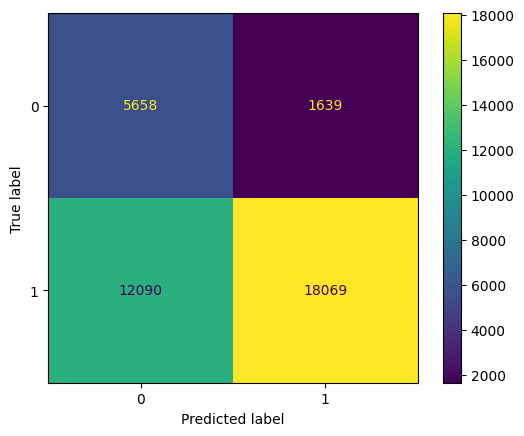

In [ ]:
print("Confusion Matrix:")
print('-'*50)
ConfusionMatrixDisplay(conf_matrix).plot();

### Precision Score:
precision score = tp/ (tp+fp)

In [ ]:
precision_score = 18069 * 100/(18069+1639)
print(precision_score)

91.68358027197077


### Recall Score

In [ ]:
recall_score = 18069 * 100 / (18069 +12090)
print(recall_score)

59.91246394111211


### F1 Score

In [ ]:
f1_score = 2 * precision_score * recall_score/(precision_score + recall_score)
print(f1_score)

72.46876692000721


## Checking the Probabilites for the Class 0 and Class 1:

In [ ]:
Probability = model.predict_proba(X_test)
Probability[:10]

array([[0.19675264, 0.80324736],
       [0.83387036, 0.16612964],
       [0.59095316, 0.40904684],
       [0.76210415, 0.23789585],
       [0.52841291, 0.47158709],
       [0.22130821, 0.77869179],
       [0.91932577, 0.08067423],
       [0.28293102, 0.71706898],
       [0.22329576, 0.77670424],
       [0.2386945 , 0.7613055 ]])

In [ ]:
probabilities = Probability[:, 1]
probabilities

array([0.80324736, 0.16612964, 0.40904684, ..., 0.69666855, 0.68162809,
       0.57575233])

## Plot ROC CURVE:

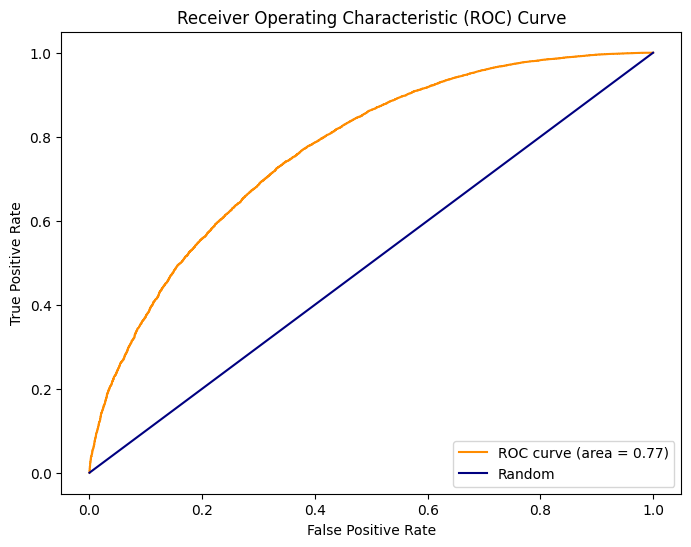

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right');

## Precision Recalll Curve:

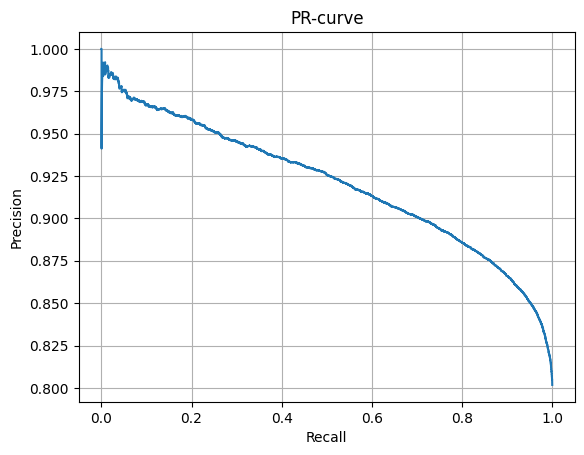

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, probabilities)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.grid()
plt.show()

# Insights and Recommendations:

In [ ]:
- 80% of the customers have fully paid their loan.
- While the remaining 20% are categorized as defaulters.

- The organization can utilize the trained model to predict whether an individual is likely to fulfill their loan obligations or become a defaulter.
- The model attains a 89% F1-score for the negative class (Fully Paid) and a 62% F1-score for the positive class (Charged off).
- Through the acquisition of additional data, the adoption of a more intricate model, or the refinement of hyperparameters,
it is feasible to enhance the performance of the model.
-With an area under the ROC curve (ROC AUC) of 0.73, the model correctly classifies approximately 73% of instances, signifying good performance.
- However, there remains room for enhancement.
- The precision-recall curve illustrates the trade-off between precision and recall as the threshold varies.
- A higher threshold yields higher precision but lower recall, and vice versa.
- The optimal point on the curve is determined by the specific requirements of the application.

-Following dataset balancing, significant changes are observed in the precision and recall scores for both classes.
- The accuracy of the Logistic Regression Classifier on the test set is 0.891, indicating decent performance that is not merely due to chance.

- The features that significantly influenced the models outcome are 'grade' and 'pub_rec', representing LoanTap assigned loan grade
and negative records on the borrower's public credit profile, respectively.

-Additionally, the analysis indicates that applicants from regions with the pincodes '11650', '86630', and '93700' have not made any loan repayments.
This suggests two possibilities:

There may be missing data regarding loan repayment for these regions.
Applicants from these regions are unlikely to repay the loan granted by LoanTap.
Based on these findings, LoanTap should carefully evaluate applicants from these regions to mitigate potential risks.